In [1]:
import cv2 as cv
from glob import glob
from matplotlib import pyplot as plt
import numpy as np

In [6]:
def resize_image(image):
    dim = (544, 544)
    img = cv.resize(image, dim)
    return(img)

In [7]:
def normalize_histogram(image):
    equ = cv.equalizeHist(image)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(image)
    return cl1

In [8]:
def simple_processing(image):
    image = cv.GaussianBlur(image, (3,3), 0)
    image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, 2)

    kernel = np.ones((2,2), np.uint8)
    image = cv.dilate(image,kernel,iterations = 1)
    
    result = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

    return result

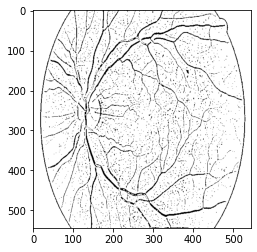

In [9]:
images = glob('dataset/training/image/*')
i = 1
for image in images:
    img = cv.imread(image, 0)
    img = resize_image(img)
    img = normalize_histogram(img)
    img = simple_processing(img)
    file_name = "res/photo" + str(i)
    plt.imshow(img)
    plt.savefig(file_name)
    i += 1
